In [1]:
import pandas as pd
df=pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df['height'].min()

54.26313333

In [4]:
df['height'].max()

78.99874235

In [5]:
df['height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [6]:
df['height'].mean()

66.3675597548656

In [7]:
df['height'].std()

3.847528120795573

# 3 STD Deviation outliers detection

In [8]:
upper_limit=df['height'].mean()+3*df['height'].std()
upper_limit

77.91014411725232

In [9]:
lower_limit=df['height'].mean()-3*df['height'].std()
lower_limit

54.824975392478876

In [10]:
df_outlier=df[(df['height']>upper_limit)|(df['height']<lower_limit)]
df_outlier.shape

(7, 2)

In [11]:
df_no_outlier=df[(df['height']<upper_limit)&(df['height']>lower_limit)]
df_no_outlier.shape

(9993, 2)

# Z Score

In [12]:
df.shape

(10000, 2)

In [16]:
df.columns

Index(['gender', 'height'], dtype='object')

In [19]:
df.describe()

,height,zscore
count,10000.000000,1.000000e+04
mean,66.367560,1.062926e-13
std,3.847528,1.000000e+00
min,54.263133,-3.146027e+00
25%,63.505620,-7.438384e-01
50%,66.318070,-1.286272e-02
75%,69.174262,7.294819e-01
max,78.998742,3.282934e+00


In [18]:
df['zscore']=(df['height']-df['height'].mean())/df['height'].std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
###### The above is like :
# ( 73.847017 - 66.367560 ) / 3.847528 = 1.943964

In [20]:
df_outlier=df[(df['zscore']>3)|(df['zscore']<-3)]
df_outlier.shape

(7, 3)

In [21]:
df_no_outlier=df[(df['zscore']<3)&(df['zscore']>-3)]
df_no_outlier.shape

(9993, 3)

# Practice Again

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [5]:
df = pd.read_csv('heights.csv')
df.sample(7)

,gender,height
9535,Female,61.405979
7704,Female,65.408782
6876,Female,63.017257
5913,Female,63.151629
9412,Female,67.898106
2933,Male,71.774206
9008,Female,62.868381


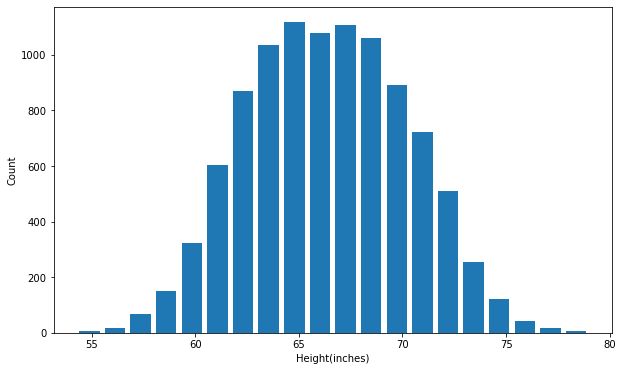

In [6]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [7]:
df.height.min()

54.26313333

In [8]:
df.height.max()

78.99874235

In [9]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [10]:
df.height.mean()

66.3675597548656

In [11]:
df.height.std()

3.847528120795573

In [12]:
upper_limit = df.height.mean()+3*df.height.std()
upper_limit

77.91014411725232

In [13]:
lower_limit = df.height.mean()-3*df.height.std()
lower_limit

54.824975392478876

In [14]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [16]:
df_no_outlier=df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier.shape

(9993, 2)

In [17]:
df.shape[0] - df_no_outlier.shape[0]

7

In [20]:
df['zscore']=(df.height - df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [21]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [22]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [27]:
no_out=df[(df.zscore>-3)&(df.zscore<3)]
no_out.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [28]:
df.shape[0]- no_out.shape[0]

7